# Случайные процессы. Прикладной поток.
## Практическое задание 1

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[СП17] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Дедлайн и система оценивания будут объявлены позже.

<IMG SRC="https://www.wikitree.com/images/wikitree-logo.png">


В Британской империи в Викторианскую эпоху (1837—1901) было обращено внимание на вымирание аристократических фамилий. В связи с этим в своей статье в The Educational Times в 1873 году Гальтон поставил вопрос о вероятности вымирания фамилии. Решение этого вопроса нашел Ватсон и вместе в 1874 году они написали статью "On the probability of the extinction of families".
На сайте <a href="http://wikitree.com">wikitree.com</a> в свободно распространяемом формате собрано большое количество данных о родословных различных людей. В коллекции есть как люди, жившие во времена поздней античности, так и наши современники. На основе некоторой части этих данных вам предстоит провести исследование о вымирании фамилий.

Вам предоставляются несколько файлов, в которых содержатся данные о некоторых родословных. Вам предстоит проводить исследование на нескольких из этих файлов (каких именно, см. в таблице). Формат файлов следующий:

`generation \t name \t gender \t birthday \t deathdate \t parents \t siblings \t spouses \t children`

Эти данные означают номер поколения, фамилию, пол, дату рождения, дату смерти, родителей, братьев и сестер, супруг, детей соответственно. Если какая-то характеристика неизвестна (кроме номера поколения и фамилии), вместо нее ставится пустая подстрока. Если каких-то характеристик несколько, то они разделены через ";". Все люди представлены некоторым идентификатором `<id>`, который соответствует адресу `http://www.wikitree.com/wiki/<id>`. Например, идентификатор `Romanov-29` соответствует адресу <a href="http://www.wikitree.com/wiki/Romanov-29">`http://www.wikitree.com/wiki/Romanov-29`</a>. В файле родословные отделяются друг от друга пустой строкой.

Для облегчения вашей работы мы предоставляем вам код, который считывает данные из этого файла и преобразует их в список ветвящихся процессов. Каждый ветвящийся процесс содержит список списков, в каждом из которых содержатся все люди из соответствующего поколения. Обратите внимание, что одни и те же родословные могут попасть в разные файлы. В таком случае их можно считать разными, но при желании вы можете удалить копии.

В предоставленных данных в каждой родословной для каждого мужчины на следующем поколении содержатся все его дети, которые были указаны на сайте. Для женщин дети в данной родословной не указаны. Это связано с тем, что женщины обычно меняют свою фамилию, когда выходят замуж, тем самым, они переходят в другую ветку. С точки зрения ветвящихся процессов, нужно иметь в виду, что если у мужчины родилось 3 мальчика и 4 девочки, то у него 3 потомка как продолжателя фамилии.

Ваша задача --- исследовать процесс вымирания фамилий на основе предложенных данных. В данном задании вам предстоит сделать оценку закона размножения, а в следующем задании --- провести остальной анализ.

In [16]:
import numpy as np
import scipy.stats as sps
from collections import Counter  # это может пригодиться
from BranchingProcess import Person, BranchingProcess, read_from_files

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
%matplotlib inline

## 1. Описательный анализ

Большая часть кода, необходимая для проведения данного анализа, является технической и основывается на работе с пакетом `BranchingProcess`. Поэтому данный код полностью вам выдается, вам нужно только выполнить его, подставить имена файлов. Кроме того, код анализа позволит вам лучше понять структуру данных.

Считайте данные с помощью предложенного кода. Посчитайте количество родословных.

In [269]:
with open("Варианты.txt", "r") as f:
    for s in f.readlines():
        if ("Шевкунов" in s):
            print(s)

594 Шевкунов Кирилл Сергеевич АД	-=-	P O N I C R T J S E



In [23]:
first_letters = "P O N I C R T J S E"
fn_prefix = "./data/"
fn_postfix = ".txt"
file_names = []
for c in first_letters:
    if c != " ":
        file_names.append(fn_prefix + c + fn_postfix)

for v in file_names:
    print(v)

./data/P.txt
./data/O.txt
./data/N.txt
./data/I.txt
./data/C.txt
./data/R.txt
./data/T.txt
./data/J.txt
./data/S.txt
./data/E.txt


In [24]:
processes = read_from_files(file_names)
print(len(processes))

55337


В имеющихся данных очень много людей, про которых известно лишь то, что они когда-то существовали. Обычно их фамилия неизвестна (вместо фамилии у них может стоять, к примеру, `B-290`), а у некоторых из них неизвестен даже пол, не говоря уже о родителях и детях. Такие данные стоит удалить.

Удалите все процессы, состоящие только из одного поколения (в котором, естественно, будет только один человек).
Сколько осталось процессов?

In [25]:
for i in range(len(processes))[::-1]:
    if len(processes[i].generations) < 2:
        del processes[i]

print(len(processes))

15841


Для лучшего понимания задачи и предложенных данных посчитайте следующие характеристики: минимальное, максимальное и среднее число поколений в роду, год рождения самого старого и самого молодого человека, среднюю продолжительность жизни.

In [26]:
# Пробный вывод для лучшего понимания происходящего
# str(processes[0])
for generation in processes[0].generations:
    print("___GENERATION__")
    for man in generation:
        print(man)

___GENERATION__
Murdoch-533	male	1740--	1822-Feb-18			Rodger-269;Ross-7636	Murdoch-527;Murdoch-534;Murdoch-535;Murdoch-536;Murdoch-537;Murdoch-538
___GENERATION__
Murdoch-527	male	1792-Mar-28	1852-Jun-05	Murdoch-533;Rodger-269	Murdoch-534;Murdoch-535;Murdoch-536;Murdoch-537;Murdoch-538	Richardson-9305	Murdoch-515;Murdoch-528
Murdoch-534	male	1800-Mar-08		Murdoch-533;Ross-7636	Murdoch-527;Murdoch-535;Murdoch-536;Murdoch-537;Murdoch-538		
Murdoch-535	female	1804-Feb-11		Murdoch-533;Ross-7636	Murdoch-527;Murdoch-534;Murdoch-536;Murdoch-537;Murdoch-538		
Murdoch-536	female	1806-Jan-26	1863--	Murdoch-533;Ross-7636	Murdoch-527;Murdoch-534;Murdoch-535;Murdoch-537;Murdoch-538	Jamieson-955	Jamieson-956;Jamieson-957;Jamieson-958;Jamieson-959;Jamieson-960;Jamieson-961;Jamieson-962
Murdoch-537	female	1807-Dec-13		Murdoch-533;Ross-7636	Murdoch-527;Murdoch-534;Murdoch-535;Murdoch-536;Murdoch-538		
Murdoch-538	male	1809-Oct-12		Murdoch-533;Ross-7636	Murdoch-527;Murdoch-534;Murdoch-535;Murdoch-536;Mur

In [27]:
generation_counts = []
years = []

for pedigree in processes:
    generation_counts.append(len(pedigree.generations))
    
    for generation in pedigree.generations:
        for person in generation:
            if person.birthday != '':
                years.append(person.birthday.split('-')[0])

years = np.array(years, dtype=int)
print('Минимальное число поколений в роду:', min(generation_counts))
print('Максимальное число поколений в роду:', max(generation_counts))
print('Среднее число поколений в роду:', round(np.mean(generation_counts), 1))
print('Год рождения самого старого:', min(years))
print('Год рождения самого молодого:', max(years))

Минимальное число поколений в роду: 2
Максимальное число поколений в роду: 81
Среднее число поколений в роду: 3.4
Год рождения самого старого: 1
Год рождения самого молодого: 2000


Постройте гистограмму зависимости количества поколений в родословной от количества родословных.
На следующем графике отложите на временной оси года рождения всех людей.

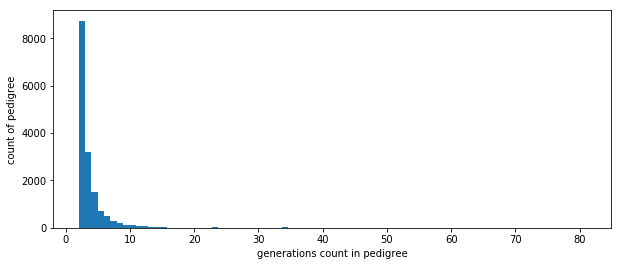

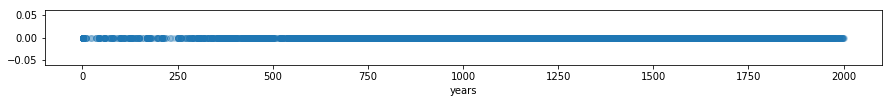

In [28]:
plt.figure(figsize=(10, 4))
plt.hist(generation_counts, bins=80)
plt.xlabel('generations count in pedigree')
plt.ylabel('count of pedigree') # было pedogree
plt.show()

plt.figure(figsize=(15, 1))
plt.scatter(years, np.zeros_like(years), alpha=0.2)
plt.xlabel('years')
plt.show()

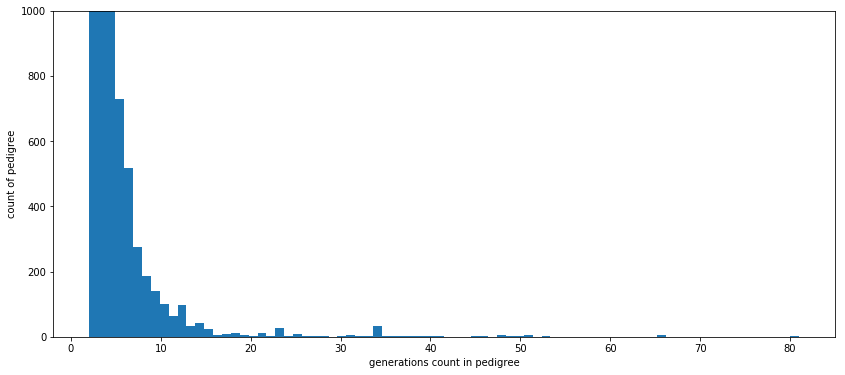

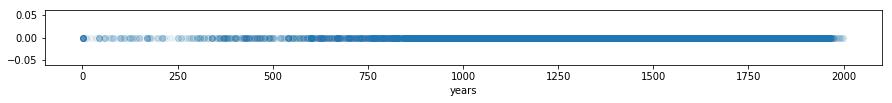

In [29]:
plt.figure(figsize=(14, 6)) # was figsize=(10,4)
plt.ylim(ymax=1000)
plt.hist(generation_counts, bins=80)
plt.xlabel('generations count in pedigree')
plt.ylabel('count of pedigree') # было pedogree

plt.show()

plt.figure(figsize=(15, 1))
plt.scatter(years, np.zeros_like(years), alpha=0.025) # was alpha=0.2
plt.xlabel('years')
plt.show()

Посчитайте среднюю продолжительность жизни.

In [30]:
ages = []
for pedigree in processes:
    for generation in pedigree.generations:
        for person in generation:
            if person.birthday != '' and person.deathdate != '':
                ages.append(int(person.deathdate.split('-')[0]) - \
                            int(person.birthday.split('-')[0]))

### !  В коде выше мы берём разность года рождения и года смерти, 
### ! т.е. продолжительности жизни оценена с ошибкой до года,
### ! хотя среднее должно пострадать не сильно

mean_age = np.mean(ages)
print(round(mean_age, 2))

56.56


## 2. Оценка закона размножения

Для начала предположим, что все выданные вам процессы являются частью одного большого процесса с общим предком. В следующем задании рассмотрим так же случай, когда все процессы являются разными.

Чтобы проводить какой-либо анализ ветвящегося процесса нужно некоторым образом оценить закон размножения. Кажется,  что для этого достаточно посчитать количество сыновей у каждого человека, получив тем самым выборку неотрицательных целых чисел. Однако, проблема в том, что данные неполные, в частности, некоторые поля могут быть не заполнены. Тем не менее обычно у человека указаны либо все дети, либо не указаны вообще. 
Таким образом, условно мы можем разделить выборку на две части: поле детей заполнено (в т.ч. если у человека на самом деле нет детей), поле детей незаполнено. Если бы первая часть выборки была бы полностью известна, что распределение можно оценить по ней. Нам же неизвестен размер выборки и количество нулевых элементов в ней. Количество положительных элементов известно.


**Математическая постановка задачи**

$\mathsf{P}_\theta$ --- неизвестное распределение из некоторого класса распределений $\mathcal{P}$ на $\mathbb{Z}_+$.

$X_1, ..., X_n$ --- выборка из распределения $\mathsf{P}_\theta$, причем $n$ и количество нулей в выборке неизвестны. 

$Y_1, ..., Y_s$ --- положительная подвыборка, которая полностью нам известна. В нашей задаче $Y_j$ --- количество сыновей у $j$-го человека среди тех, у кого есть хотя бы один сын.

Оценку параметра $\theta$ можно найти методом максимального правдоподобия:

$$\prod_{i=1}^s \mathsf{P}_\theta (Y_i \left| Y_i > 0 \right) \to \max_\theta$$ 

В качестве классов распределений $\mathcal{P}$ рассмотрите пуассоновское и геометрическое распределения. По желанию можете рассмотреть другие классы распределений, осмысленные в данной задаче

**Внимание!** Применение метода `fit` из `scipy.stats` является некорректным в данной задаче, поскольку рассматривается усеченная выборка. Задачу максимизации нужно решить явно, выписав все формулы (которые тоже нужно прислать вместе с кодом).

После оценки параметров проведите проверку принадлежности неизвестного распределения рассматриваемому семейству распределений $\mathcal{P}$ с помощью критерия хи-квадрат, взяв для для него то распределение из $\mathcal{P}$, которое соответствует оценке максимального правдоподобия. Постарайтесь учесть все особенности проверки гипотез, которые обсуждались на семинаре. Для каждого класса постройте также график частот и функции $\mathsf{P}_\theta (y \left| Y > 0 \right).$

____________________

### Оценка ММП

#### 1.Геометрическое распределение

$P_p(X = n) = (1 - p)^n p$ (Геометрическое распределение с нулём, $X \in \{0, 1, 2, ...\}$)

Для положительных $Y_i$ имеем:
$P_p(Y_i | Y_i > 0) = \frac{P(Y_i)}{P(Y_i > 0)} = \frac{P(Y_i)}{1 - P(Y_i = 0)} 
= \frac{(1 - p)^n p}{1 - p} = (1 - p)^{n - 1} p $, т.е. положительные $Y_i$ распределены по геометрическому распределению без нуля.

$$\prod\limits_{i=1}^s P_p(Y_i | Y_i > 0) = \prod\limits_{i=1}^s (1 - p)^{Y_i - 1} p 
= (1-p) ^ {\sum\limits_{i=1}^s{Y_i} - s} p^s $$

$$\Rightarrow (\sum\limits_{i=1}^s{Y_i} - s) \ln{(1-p)} + s \ln{p}$$
Возьмём производную для нахождения точки максимума (из вида логарифмической функции правдоподобия ясно, что при $p \in [0, 1]$ и положительных $Y_i$ (коэффициенты при логарифмах неотрицательны) наблюдается один максимум):

$$ (\sum\limits_{i=1}^s{Y_i} - s) \frac{-1}{1-p} + \frac{s}{p} =: 0 $$
$$ \frac{s}{1-p} - \frac{\sum\limits_{i=1}^s{Y_i}}{1-p} + \frac{s}{p} = 0$$ 
$$ \frac{sp + s - sp}{(1-p)p} = \frac{\sum\limits_{i=1}^s{Y_i}}{1-p}$$ 
$$ p = \frac{s}{\sum\limits_{i=1}^s{Y_i}} = \frac{1}{\overline{Y}}$$

**Итого:** $ p^* = 1/\overline{Y}$ - оценка по ММП для геометрического распределения

#### 2.Пуассоновское распределение

$P_\lambda(X = k) = \frac{\lambda^k}{k!} e^{-\lambda}$; $P_\lambda(X = 0) = e^{-\lambda}$; $P_\lambda(X > 0) = 1 - e^{-\lambda}$

$$\prod\limits_{i=1}^s P_\lambda(Y_i | Y_i > 0)
= \prod\limits_{i=1}^s \frac{\frac{\lambda^{Y_i}}{{Y_i}!} e^{-\lambda}}{1 - e^{-\lambda}}
= \frac{\frac{\lambda^{\sum\limits_{i=1}^s{Y_i}}}{\prod\limits_{i=1}^s {Y_i}!} e^{-\lambda n}}{(1 - e^{-\lambda})^n}$$

$$\Rightarrow L(\lambda, Y) = \sum\limits_{i=1}^s{Y_i} \ln{\lambda} - n \lambda - \ln(\prod\limits_{i=1}^s {Y_i}!) - n \ln(1 - e^{-\lambda})$$

$$\Rightarrow L'(\lambda, Y) = \sum\limits_{i=1}^s{Y_i} \frac{1}{\lambda} - n - n \frac{e^{-\lambda}}{(1 - e^{-\lambda})} 
= \sum\limits_{i=1}^s{Y_i} \frac{1}{\lambda} - \frac{n}{(1 - e^{-\lambda})} =: 0$$
Оценка по ММП достигается в корне:
$$ \overline{Y} = \frac{\lambda}{(1 - e^{-\lambda})}$$

Получена возрастающая на $\lambda \in (0, + \infty)$ функция ($\frac{d}{dx} \frac{x}{(1 - e^{-x})} = \frac{e^x (-x + e^x - 1)}{(e^x - 1)^2} > 0$), при этом $\overline{Y} \geq s \geq 1$, а $\lim\limits_{\lambda \rightarrow +0} (\frac{\lambda}{(1 - e^{-\lambda})}) = 1$ (по Тейлору), значит у этого уравнения есть корень, при том один. Его можно найти двоичным поиском или поиском по сетке.

**Итого:** Оценка по ММП достигается в корне (он выражается только через страшные функции и его предлагается искать численными методами, благо функция хорошо для этого подходит):
$$ \overline{Y} = \frac{\lambda}{(1 - e^{-\lambda})}$$

_______

### Проверка теоретических выкладок практическим методом (самодеятельность)
Для проверки предлагается взять числа из некоторых геометрического и пуассоновского распределения и вычислить оценку ММП по сгенерированным данным, сравнить её с исходным параметром "на глаз" (разумно было бы провести проверку множество раз с различными параметрами и размерами выборок, проверяя стат. значимость, например, тем же тестом хи-квадрат, но этот раздел не требуется, его просто жалко удалять)

In [14]:
import scipy.stats as sps
import scipy.optimize
import numpy as np # слишком долго листать на верх

In [13]:
X = sps.poisson(mu=777.).rvs(size=1000)
Y = np.array([x for x in X if x > 0])

print(X[:10])
print(Y[:10])

def f(x):
    return x / (1. - np.exp( - x)) - Y.mean()

scipy.optimize.root(f,2.) # найденный x должен ~= mu

[762 737 780 776 797 784 759 809 749 813]
[762 737 780 776 797 784 759 809 749 813]


    fjac: array([[-1.]])
     fun: array([ 0.])
 message: 'The solution converged.'
    nfev: 5
     qtf: array([ 175.125])
       r: array([-1.])
  status: 1
 success: True
       x: array([ 777.125])

______________

p =  0.5374137464214082


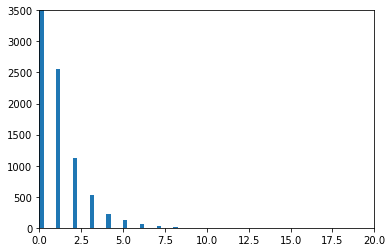

X[:15] = [0 0 0 0 0 0 0 4 0 0 2 3 1 3 1]
Y[:10] = [4 2 3 1 3 1 1 2 3 2]


In [19]:
p = 0.1 + np.random.rand() * 0.8 # ~ U[0.1, 0.9]
print("p = ", p)
X = sps.geom(p=p).rvs(size=10000) - 1
Y = np.array([x for x in X if x > 0])
plt.ylim(ymax=3500)
plt.xlim(xmax=20)
plt.hist(X, bins = 40)
plt.show()
print("X[:15] =", X[:15])
print("Y[:10] =", Y[:10])

In [21]:
theta = 1. / np.array(Y).mean()
print("p = ", p)
print("theta = ", theta) # должны быть приблизительно равны

p =  0.5374137464214082
theta =  0.544880785414


_____________________

### Обработка данных

Составим, для начала Y

In [42]:
male = set()

Y_names = list()
for pedigree in processes:
    for generation in pedigree.generations:
        for person in generation:
            if person.gender == "male":
                male.add(person.name)

male

{'Deer-166',
 'Samoilov-2',
 'Sabourin-175',
 'Packer-915',
 'Hrolfsson-10',
 'Nahrgang-21',
 'Ochsenreither-23',
 'Ober-60',
 'Dyer-5013',
 'Fairchild-744',
 'Öhri-19',
 'Inglehart-26',
 'Sackrison-3',
 'Sampson-1451',
 'Saeger-21',
 'Ochs-136',
 'Naden-25',
 'Taft-425',
 'Bjørnsson-145',
 'Taylor-31908',
 'Nauchleer-11',
 'Sample-469',
 'Oakes-720',
 'Ely-902',
 'Taffe-2',
 'Padgett-374',
 'Samaha-308',
 'Bass-441',
 'Eddy-855',
 'Ebaugh-21',
 'Damas-2',
 'Tryon-566',
 'Saloger-2',
 'Eales-57',
 'Safford-136',
 'Oberg-126',
 'Rackliffe-19',
 'Pauw-314',
 'Olafsson-7',
 'Earnest-147',
 'Salera-4',
 'Odenbaugh-79',
 'Cynwrig-13',
 'Easterbrook-100',
 'Estey-168',
 'Salmen-19',
 'Dyer-742',
 'Hoddy-38',
 'Nathan-86',
 'Phillips-2160',
 'Rabe-130',
 'Eagle-64',
 'Samson-428',
 'Polk-128',
 'Rabbitt-7',
 'Taylor-145',
 'Easterling-160',
 'Ximenez-1',
 'Buckland-1409',
 'Padden-44',
 'Windle-81',
 'Pace-38',
 'Safford-92',
 'Buckland-2699',
 'Nedrow-890',
 'Asturias-32',
 'Kinman-420',
 'E

In [43]:
Y = list()

for pedigree in processes:
    for generation in pedigree.generations:
        for person in generation:
            if person.gender == "male":
                child_cnt = 0
                for child in person.children:
                    if child in male:
                        child_cnt += 1
                if (child_cnt > 0):
                    Y.append(child_cnt)
print(Y[:10])

[3, 2, 5, 1, 2, 1, 1, 1, 1, 2]


In [44]:
print("len(Y)", len(Y))
Y_data_mean = np.array(Y).mean()

len(Y) 49266


_____
Найдём оценку ММП для пуассоновского распределения:

In [45]:
def poiss_tf(x):
    assert type(Y) == list # вдруг 
    return x / (1. - np.exp(-x)) - Y_data_mean
result = scipy.optimize.root(poiss_tf, 20.)
result

    fjac: array([[-1.]])
     fun: array([  8.88178420e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([ -1.01263575e-09])
       r: array([-0.77214533])
  status: 1
 success: True
       x: array([ 1.80957111])

In [46]:
mu_data = result.x[0]
mu_data

1.8095711098638814

_____
Найдём оценку ММП для геометрического распределения:

In [47]:
p_data = 1. / Y_data_mean
p_data

0.46214025740122316

___________

In [49]:
from scipy.stats import chisquare
print(len(Y))

49266


Применим тест хи-квадрат для полученных данных. Как обсуждалось на семинаре, большой размер выборки нежелателен, в силу ряда причин. Предложено было использовать выборки по сто элементов, что мы и сделаем.

In [56]:
from math import factorial

In [73]:
sub_Y = np.array(np.array(Y)[sps.randint.rvs(0, len(Y), size=100)])
Y_table = np.zeros(np.array(sub_Y).max() + 1)
for y in sub_Y:
    Y_table[y] += 1
print("Количество отцов с i детьми = ", Y_table)

YY = []
for i in range(1, len(Y_table)):
    if (Y_table[i] < 5):
        YY = Y_table[1:i]
        YY[-1] += Y_table[i:].sum()
        break
print("Количество отцов с (i+1) детьми, с укрупнёнными группами = ", YY)

p_data = 1. / sub_Y.mean()

Количество отцов с i детьми =  [  0.  52.  20.   8.   9.   7.   1.   2.   0.   1.]
Количество отцов с (i+1) детьми, с укрупнёнными группами =  [ 52.  20.   8.   9.  11.]


In [74]:
geom = []
pois = []

def geom_cond_pmf(x,p):
    q = 1. - p
    return q ** (x - 1) * p


def pois_cond_pmf(x,mu):
    e = np.exp(- mu)
    return mu ** x * e / (1. - e) / (factorial(x))

for i in range(1, len(YY)):
    geom.append(geom_cond_pmf(x=i, p=p_data))
    pois.append(pois_cond_pmf(x=i, mu=mu_data))
    
geom.append(1. - np.array(geom).sum())
pois.append(1. - np.array(pois).sum())
geom = np.array(geom) * YY.sum()
pois = np.array(pois) * YY.sum()
print("YY (данные выборки для теста) = ", YY)
print("geom (теоретическая выборка из геометрического) = ", geom)
print("pois (теоретическая выборка из пуассоновского) = ", pois)


print("\nТест для геометрического:\n", sps.chisquare(YY, geom))
print("\nТест для пуассоновского:\n", sps.chisquare(YY, pois))

YY (данные выборки для теста) =  [ 52.  20.   8.   9.  11.]
geom (теоретическая выборка из геометрического) =  [ 46.2962963   24.86282579  13.35225829   7.17065723   8.31796239]
pois (теоретическая выборка из пуассоновского) =  [ 35.42741384  32.05421229  19.33479217   8.74692033   4.43666137]

Тест для геометрического:
 Power_divergenceResult(statistic=5.1307400458940542, pvalue=0.27414388540416162)

Тест для пуассоновского:
 Power_divergenceResult(statistic=28.647190669663502, pvalue=9.2193915440860204e-06)


In [75]:
# вычисленная руками для самопроверки статистика 
((YY - geom) ** 2 / geom).sum()

5.1307400458940542

** Итого: ** при уровне значимости $\alpha = 0.05$ (он определён заранее, хотя впервые фигурирует здесь) 

- в первом тесте нулевая гипотеза, состоящая в том, что законом размножения является геометрическое распределение с оценённым выше параметром (на самом деле, некоторое его угрубление), не может быть отвергнута (pvalue > $\alpha$)

- во втором тесте нулевая гипотеза, состоящая в том, что законом размножения является пуассоновское распределение с оценённым выше параметром (на самом деле, некоторое его угрубление), должно быть от вергнуто (pvalue < $\alpha$)